### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
df = pd.read_csv('data/laptop_price.csv', encoding = 'latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### EDA

In [3]:
# basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
# basic description of 'Inches' and 'Price_euros'
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Price is in euros: convert to CAD?
- Prices of laptops in EUR and CAD don't necessarily match the conversion between currencies
- Dataset was last updated in 2020: currency conversion rate is most likely different today

Product, Screenresolution, Cpu, Gpu have relatively large number of unique values:
- one hot encoding may not be suitable with these variables
- screenresolution contains display panel type as well as resolution:
    - create new variable with display panel?

In [5]:
# null values
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

No null values.

In [6]:
# data types
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

<AxesSubplot:>

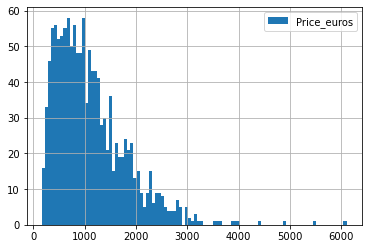

In [12]:
# histogram of price
df['Price_euros'].hist(bins = 100, legend = True)

In [13]:
# convert weight to float dtype
df['Weight_str'] = df['Weight'].str[:-2]
df['Weight_fl'] = df['Weight_str'].astype(float)


In [18]:
# drop weight and weight_str
df = df.drop(['Weight', 'Weight_str'], axis = 1)

In [19]:
# categorical variables
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS


In [39]:
# basic stats and frequency distribution
def stat_freq(x):
    print(df[x].unique())
    print('Length of unique values: ' + str(len(df[x].unique())))

    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1) 
    sns.countplot(data = df, x = x, ax = ax1)
    ax2 = fig.add_subplot(2,1,2) 
    sns.boxplot(data = df, x = x, y = 'Price_euros', ax = ax2)

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Length of unique values: 19


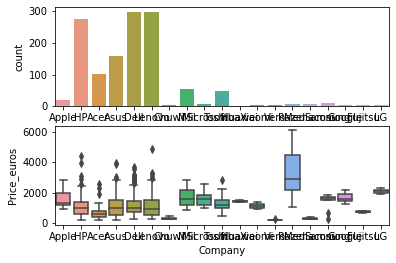

In [40]:
# company
stat_freq('Company')

['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook Max'
 'GS73VR 7RG' 'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)' 'Vostro 5471'
 'IdeaPad 520S-14IKB' 'UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10)'
 'ZenBook Pro' 'Stream 14-AX040wm' 'V310-15ISK (i5-7200U/4GB/1TB/FHD/W10)'
 'FX753VE-GC093 (i7

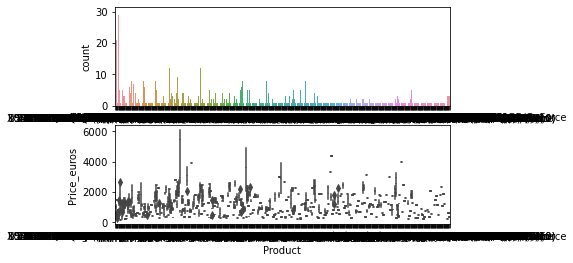

In [41]:
# product
stat_freq('Product')

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Length of unique values: 6


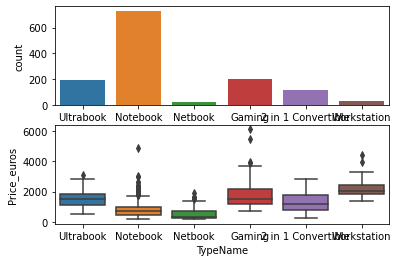

In [43]:
# typename
stat_freq('TypeName')

['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'IPS Panel Retina Display 2736x1824'
 'Touchscreen 2400x1600' '2560x1440' 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Touchscreen 1366x768' '1920x1080'
 'IPS Panel Full HD 1920x1200'
 'IP

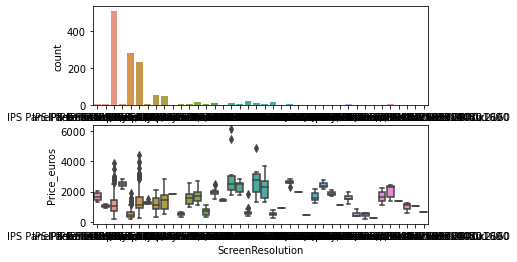

In [45]:
# screenresolution
stat_freq('ScreenResolution')

['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Atom x5-Z8350 1.44GHz' 'Intel Core i5 7300HQ 2.5GHz'
 'AMD E-Series E2-9000e 1.5GHz' 'Intel Core i5 1.6GHz'
 'Intel Core i7 8650U 1.9GHz' 'Intel Atom x5-Z8300 1.44GHz'
 'AMD E-Series E2-6110 1.5GHz' 'AMD A6-Series 9220 2.5GHz'
 'Intel Celeron Dual Core N3350 1.1GHz' 'Intel Core i3 7130U 2.7GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i5 2.0GHz'
 'AMD Ryzen 1700 3GHz' 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Atom x5-Z8550 1.44GHz' 'Intel Celeron Dual Core N3060 1.6GHz'
 'Intel Core i5 1.3GHz' 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core i5 620

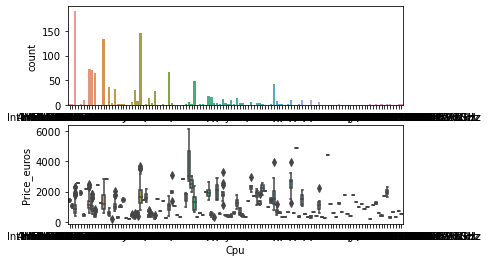

In [46]:
# cpu
stat_freq('Cpu')

['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
Length of unique values: 9


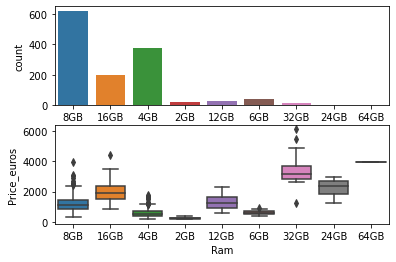

In [47]:
# ram
stat_freq('Ram')

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']
Length of unique values: 39


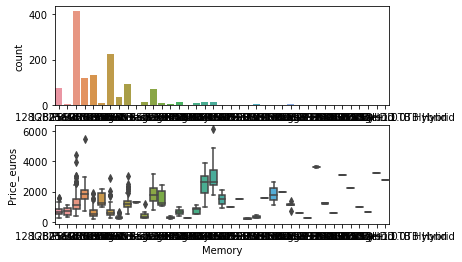

In [48]:
# memory
stat_freq('Memory')

['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650' 'AMD Radeon R5' 'Intel Iris Pro Graphics'
 'Nvidia GeForce MX150' 'Intel UHD Graphics 620' 'Intel HD Graphics 520'
 'AMD Radeon Pro 555' 'AMD Radeon R5 M430' 'Intel HD Graphics 615'
 'AMD Radeon Pro 560' 'Nvidia GeForce 940MX' 'Intel HD Graphics 400'
 'Nvidia GeForce GTX 1050' 'AMD Radeon R2' 'AMD Radeon 530'
 'Nvidia GeForce 930MX' 'Intel HD Graphics' 'Intel HD Graphics 500'
 'Nvidia GeForce 930MX ' 'Nvidia GeForce GTX 1060' 'Nvidia GeForce 150MX'
 'Intel Iris Graphics 540' 'AMD Radeon RX 580' 'Nvidia GeForce 920MX'
 'AMD Radeon R4 Graphics' 'AMD Radeon 520' 'Nvidia GeForce GTX 1070'
 'Nvidia GeForce GTX 1050 Ti' 'Nvidia GeForce MX130' 'AMD R4 Graphics'
 'Nvidia GeForce GTX 940MX' 'AMD Radeon RX 560' 'Nvidia GeForce 920M'
 'AMD Radeon R7 M445' 'AMD Radeon RX 550' 'Nvidia GeForce GTX 1050M'
 'Intel HD Graphics 515' 'AMD Radeon R5 M420' 'Intel HD Graphic

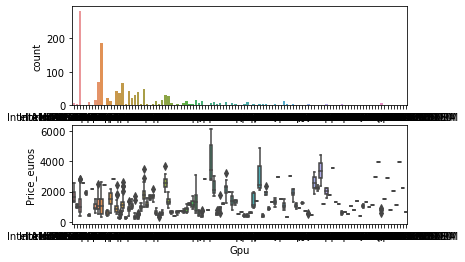

In [49]:
# gpu
stat_freq('Gpu')

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Length of unique values: 9


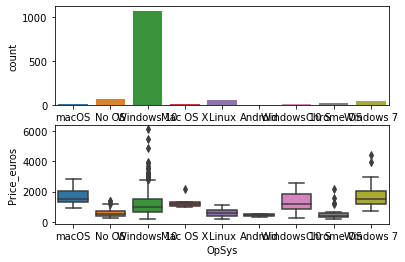

In [51]:
# opsys
stat_freq('OpSys')

In [52]:
# export df (weight has been changed to float)
df.to_csv('data/laptop_price_wf.csv')

In [6]:
# checking unique number of cpu/gpu
print(df['Cpu'].nunique())
print(df['Gpu'].nunique())

118
110
